In [1]:
%matplotlib inline  

import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np

In [2]:
# Import Data
workhome = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/work_home.csv")
qualification = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/qualification.csv")
occupation = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/occupation_msoa.csv")
nssec = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/nssec.csv")
employment = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/economic_activity.csv")
deprivation = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/deprivation.csv")
composition = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/household_composition.csv")
age_year = pd.read_csv("/Users/yobin/Desktop/USS Dissertation/Datasets/age.csv")

In [3]:
workhome.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Does_not_apply', 'Less_than_2km',
       '2km_to_less_than_5km', '5km_to_less_than_10km',
       '10km_to_less_than_20km', '20km_to_less_than_30km',
       '30km_to_less_than_40km', '40km_to_less_than_60km', '60km_and_over',
       'outside_the_UK', 'Works_mainly_from_home', 'Total'],
      dtype='object')

In [4]:
workhome['distance_less_than_10km']= (workhome['Less_than_2km']+workhome['2km_to_less_than_5km']+workhome['5km_to_less_than_10km'])/workhome['Total']
workhome['distance_10km_to_30km']= (workhome['10km_to_less_than_20km']+workhome['20km_to_less_than_30km'])/workhome['Total']
workhome['distance_30km_to_60km']= (workhome['30km_to_less_than_40km']+workhome['40km_to_less_than_60km'])/workhome['Total']
workhome['distance_more_than_60km']= workhome['60km_and_over']/workhome['Total']
workhome['Works_from_home']= workhome['Works_mainly_from_home']/workhome['Total']

In [5]:
wfh = workhome[['Middle layer Super Output Areas Code', 'Works_from_home', 'distance_less_than_10km', 'distance_10km_to_30km',
       'distance_30km_to_60km', 'distance_more_than_60km']]
wfh.head(5)

,Middle layer Super Output Areas Code,Works_from_home,distance_less_than_10km,distance_10km_to_30km,distance_30km_to_60km,distance_more_than_60km
0,E02000001,0.419814,0.151748,0.011305,0.001865,0.003263
1,E02000002,0.081874,0.124260,0.080787,0.010264,0.003140
2,E02000003,0.115751,0.126061,0.101369,0.006758,0.003812
3,E02000004,0.117638,0.143546,0.096099,0.006628,0.004519
4,E02000005,0.096733,0.142032,0.093665,0.006677,0.005143


In [6]:
qualification.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'No_qualifications',
       'Level_1_and_entry_level_qualifications', 'Level_2_qualifications',
       'Apprenticeship', 'Level_3_qualifications',
       'Level_4_qualifications_or_above', 'Other', 'Does_not_apply', 'total'],
      dtype='object')

In [7]:
qualification['no_qualification']= qualification['No_qualifications']/qualification['total']
qualification['qualification_under_level4']= (qualification['Level_1_and_entry_level_qualifications']+qualification['Level_2_qualifications']+qualification['Level_3_qualifications'])/qualification['total']
qualification['qualification_level4_above']= qualification['Level_4_qualifications_or_above']/qualification['total']

In [8]:
qual = qualification[['Middle layer Super Output Areas Code', 'no_qualification', 'qualification_level4_above']]
qual

,Middle layer Super Output Areas Code,no_qualification,qualification_level4_above
0,E02000001,0.061619,0.691788
1,E02000002,0.173026,0.223376
2,E02000003,0.163288,0.260742
3,E02000004,0.188102,0.246084
4,E02000005,0.160487,0.243482
...,...,...,...
2862,E02007112,0.054471,0.625997
2863,E02007113,0.082373,0.511787
2864,E02007114,0.099670,0.485790
2865,E02007115,0.119348,0.389972


In [9]:
occupation.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       '1_Managers_directors_and_senior_officials',
       '2_Professional_occupations',
       '3_Associate_professional_and_technical_occupations',
       '4_Administrative_and_secretarial_occupations',
       '5_Skilled_trades_occupations',
       '6_Caring_leisure_and_other_service_occupations',
       '7_Sales_and_customer_service_occupations',
       '8_Process_plant_and_machine_operatives', '9_Elementary_occupations',
       'Does_not_apply', 'total'],
      dtype='object')

In [10]:
occupation['Managers_directors']= occupation['1_Managers_directors_and_senior_officials']/occupation['total']
occupation['Professional_occupations']= occupation['2_Professional_occupations']/occupation['total']
occupation['Technical_occupations']= occupation['3_Associate_professional_and_technical_occupations']/occupation['total']
occupation['Secretarial_occupations']= occupation['4_Administrative_and_secretarial_occupations']/occupation['total']
occupation['Skilled_trades_occupations']= occupation['5_Skilled_trades_occupations']/occupation['total']
occupation['Service_occupations']= occupation['6_Caring_leisure_and_other_service_occupations']/occupation['total']
occupation['Sales_occupations']= occupation['7_Sales_and_customer_service_occupations']/occupation['total']
occupation['Machine_operatives']= occupation['8_Process_plant_and_machine_operatives']/occupation['total']
occupation['Elementary_occupations']= occupation['9_Elementary_occupations']/occupation['total']

In [11]:
occu = occupation[['Middle layer Super Output Areas Code', 'Managers_directors',
       'Professional_occupations', 'Technical_occupations',
       'Secretarial_occupations', 'Skilled_trades_occupations',
       'Service_occupations', 'Sales_occupations', 'Machine_operatives',
       'Elementary_occupations']]
occu.head(5)

,Middle layer Super Output Areas Code,Managers_directors,Professional_occupations,Technical_occupations,Secretarial_occupations,Skilled_trades_occupations,Service_occupations,Sales_occupations,Machine_operatives,Elementary_occupations
0,E02000001,0.128701,0.273840,0.119725,0.031126,0.011308,0.017720,0.014222,0.005829,0.020751
1,E02000002,0.033442,0.064349,0.037185,0.035977,0.049982,0.045636,0.030665,0.036219,0.057709
2,E02000003,0.044360,0.079016,0.046699,0.049125,0.050251,0.044966,0.036995,0.037602,0.064807
3,E02000004,0.039458,0.092470,0.052711,0.051657,0.058735,0.045482,0.032530,0.042169,0.053765
4,E02000005,0.038975,0.070733,0.045922,0.042133,0.050343,0.050704,0.039156,0.040509,0.060357


In [12]:
employment.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'Economically_active_excluding_full_time_students_In_employment_Employee_Part_time',
       'Economically_active_excluding_full_time_students_In_employment_Employee_Full_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_with_employees_Part_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_with_employees_Full_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_without_employees_Part_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_without_employees_Full_time',
       'Economically_active_excluding_full_time_students_Unemployed',
       'Economically_active_and_a_full_time_student_In_employment_Employee_Part_time',
       'Economically_active_and_a_full_time_student_In_employment_Employee_Full_time',
       'Economically_active_a

In [13]:
employment['active_employee']= employment['active_employee']/employment['total']
employment['active_self_employed']= employment['active_self_employed']/employment['total']
employment['active_unemployed']= employment['active_unemployed']/employment['total']
employment['Inactive']= employment['Inactive']/employment['total']

In [14]:
employment.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'Economically_active_excluding_full_time_students_In_employment_Employee_Part_time',
       'Economically_active_excluding_full_time_students_In_employment_Employee_Full_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_with_employees_Part_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_with_employees_Full_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_without_employees_Part_time',
       'Economically_active_excluding_full_time_students_In_employment_Self_employed_without_employees_Full_time',
       'Economically_active_excluding_full_time_students_Unemployed',
       'Economically_active_and_a_full_time_student_In_employment_Employee_Part_time',
       'Economically_active_and_a_full_time_student_In_employment_Employee_Full_time',
       'Economically_active_a

In [15]:
employ = employment[['Middle layer Super Output Areas Code', 'active_employee', 
                     'active_self_employed']]
employ.head(5)

,Middle layer Super Output Areas Code,active_employee,active_self_employed
0,E02000001,0.058022,0.126762
1,E02000002,0.101425,0.085970
2,E02000003,0.115955,0.107202
3,E02000004,0.103012,0.087952
4,E02000005,0.110800,0.086619


In [16]:
deprivation.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'Household_is_not_deprived_in_any_dimension',
       'Household_is_deprived_in_one_dimension',
       'Household_is_deprived_in_two_dimensions',
       'Household_is_deprived_in_three_dimensions',
       'Household_is_deprived_in_four_dimensions', 'total'],
      dtype='object')

In [17]:
deprivation['not_deprived']= deprivation['Household_is_not_deprived_in_any_dimension']/deprivation['total']
deprivation['highly_deprived']= deprivation['Household_is_deprived_in_four_dimensions']/deprivation['total']

In [18]:
depri = deprivation[['Middle layer Super Output Areas Code', 'not_deprived']]
depri.head(5)

,Middle layer Super Output Areas Code,not_deprived
0,E02000001,0.597680
1,E02000002,0.332404
2,E02000003,0.419593
3,E02000004,0.439151
4,E02000005,0.425344


In [19]:
composition.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'One_person_household_Aged_66_years_and_over',
       'One_person_household_Other',
       'Single_family_household_All_aged_66_years_and_over',
       'Single_family_household_Married_or_civil_partnership_couple_No_children',
       'Single_family_household_Married_or_civil_partnership_couple_Dependent_children',
       'Single_family_household_Married_or_civil_partnership_couple_All_children_non_dependent',
       'Single_family_household_Cohabiting_couple_family_No_children',
       'Single_family_household_Cohabiting_couple_family_With_dependent_children',
       'Single_family_household_Cohabiting_couple_family_All_children_non_dependent',
       'Single_family_household_Lone_parent_family_With_dependent_children',
       'Single_family_household_Lone_parent_family_All_children_non_dependent',
       'Single_family_household_Other_single_family_household_Other_family_composition',
     

In [20]:
composition['family_with_children']= (composition['Single_family_household_Married_or_civil_partnership_couple_Dependent_children']+composition['Single_family_household_Cohabiting_couple_family_With_dependent_children']+composition['Single_family_household_Lone_parent_family_With_dependent_children']+composition['Other_household_types_With_dependent_children'])/composition['total']
composition['family_with_no_children']= (composition['Single_family_household_Married_or_civil_partnership_couple_No_children']+composition['Single_family_household_Cohabiting_couple_family_No_children'])/composition['total']                    

In [21]:
composition.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas',
       'One_person_household_Aged_66_years_and_over',
       'One_person_household_Other',
       'Single_family_household_All_aged_66_years_and_over',
       'Single_family_household_Married_or_civil_partnership_couple_No_children',
       'Single_family_household_Married_or_civil_partnership_couple_Dependent_children',
       'Single_family_household_Married_or_civil_partnership_couple_All_children_non_dependent',
       'Single_family_household_Cohabiting_couple_family_No_children',
       'Single_family_household_Cohabiting_couple_family_With_dependent_children',
       'Single_family_household_Cohabiting_couple_family_All_children_non_dependent',
       'Single_family_household_Lone_parent_family_With_dependent_children',
       'Single_family_household_Lone_parent_family_All_children_non_dependent',
       'Single_family_household_Other_single_family_household_Other_family_composition',
     

In [22]:
com = composition[['Middle layer Super Output Areas Code', 'family_with_children']]
com.head(5)

,Middle layer Super Output Areas Code,family_with_children
0,E02000001,0.058071
1,E02000002,0.375417
2,E02000003,0.338430
3,E02000004,0.293085
4,E02000005,0.416340


In [23]:
age_year.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Aged 15 years and under',
       'Aged 16 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 49 years',
       'Aged 50 to 64 years', 'Aged 65 years and over', 'Total'],
      dtype='object')

In [24]:
age_year['Age_16_to_24']= age_year['Aged 16 to 24 years']/age_year['Total']
age_year['Age_25_to_34']= age_year['Aged 25 to 34 years']/age_year['Total']
age_year['Age_35_to_49']= age_year['Aged 35 to 49 years']/age_year['Total']
age_year['Age_50_to_64']= age_year['Aged 50 to 64 years']/age_year['Total']
age_year['Age_65_and_over']= age_year['Aged 65 years and over']/age_year['Total']

In [25]:
age_year.columns

Index(['Middle layer Super Output Areas Code',
       'Middle layer Super Output Areas', 'Aged 15 years and under',
       'Aged 16 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 49 years',
       'Aged 50 to 64 years', 'Aged 65 years and over', 'Total',
       'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49', 'Age_50_to_64',
       'Age_65_and_over'],
      dtype='object')

In [26]:
age = age_year[['Middle layer Super Output Areas Code', 'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49', 'Age_50_to_64']]
age.head(5)

,Middle layer Super Output Areas Code,Age_16_to_24,Age_25_to_34,Age_35_to_49,Age_50_to_64
0,E02000001,0.133869,0.258068,0.211698,0.188396
1,E02000002,0.109045,0.143099,0.215071,0.143823
2,E02000003,0.114028,0.160211,0.215579,0.166277
3,E02000004,0.109639,0.151506,0.200151,0.188404
4,E02000005,0.107671,0.140162,0.242960,0.150090


In [27]:
df1 = wfh.merge(qual, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df2 = df1.merge(occu, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df3 = df2.merge(depri, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df4 = df3.merge(employ, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df5 = df4.merge(age, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')
df6 = df5.merge(com, how='left', left_on='Middle layer Super Output Areas Code', right_on='Middle layer Super Output Areas Code')

In [28]:
df6.columns

Index(['Middle layer Super Output Areas Code', 'Works_from_home',
       'distance_less_than_10km', 'distance_10km_to_30km',
       'distance_30km_to_60km', 'distance_more_than_60km', 'no_qualification',
       'qualification_level4_above', 'Managers_directors',
       'Professional_occupations', 'Technical_occupations',
       'Secretarial_occupations', 'Skilled_trades_occupations',
       'Service_occupations', 'Sales_occupations', 'Machine_operatives',
       'Elementary_occupations', 'not_deprived', 'active_employee',
       'active_self_employed', 'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49',
       'Age_50_to_64', 'family_with_children'],
      dtype='object')

In [29]:
data = df6.copy()

In [30]:
data.isnull().sum()

Middle layer Super Output Areas Code    0
Works_from_home                         0
distance_less_than_10km                 0
distance_10km_to_30km                   0
distance_30km_to_60km                   0
distance_more_than_60km                 0
no_qualification                        0
qualification_level4_above              0
Managers_directors                      0
Professional_occupations                0
Technical_occupations                   0
Secretarial_occupations                 0
Skilled_trades_occupations              0
Service_occupations                     0
Sales_occupations                       0
Machine_operatives                      0
Elementary_occupations                  0
not_deprived                            0
active_employee                         0
active_self_employed                    0
Age_16_to_24                            0
Age_25_to_34                            0
Age_35_to_49                            0
Age_50_to_64                      

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Middle layer Super Output Areas Code  2867 non-null   object 
 1   Works_from_home                       2867 non-null   float64
 2   distance_less_than_10km               2867 non-null   float64
 3   distance_10km_to_30km                 2867 non-null   float64
 4   distance_30km_to_60km                 2867 non-null   float64
 5   distance_more_than_60km               2867 non-null   float64
 6   no_qualification                      2867 non-null   float64
 7   qualification_level4_above            2867 non-null   float64
 8   Managers_directors                    2867 non-null   float64
 9   Professional_occupations              2867 non-null   float64
 10  Technical_occupations                 2867 non-null   float64
 11  Secretarial_occup

In [32]:
dataset = data.copy()

In [33]:
data.columns

Index(['Middle layer Super Output Areas Code', 'Works_from_home',
       'distance_less_than_10km', 'distance_10km_to_30km',
       'distance_30km_to_60km', 'distance_more_than_60km', 'no_qualification',
       'qualification_level4_above', 'Managers_directors',
       'Professional_occupations', 'Technical_occupations',
       'Secretarial_occupations', 'Skilled_trades_occupations',
       'Service_occupations', 'Sales_occupations', 'Machine_operatives',
       'Elementary_occupations', 'not_deprived', 'active_employee',
       'active_self_employed', 'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49',
       'Age_50_to_64', 'family_with_children'],
      dtype='object')

In [34]:
df = data.drop(['Middle layer Super Output Areas Code'], axis =1)
df

,Works_from_home,distance_less_than_10km,distance_10km_to_30km,distance_30km_to_60km,distance_more_than_60km,no_qualification,qualification_level4_above,Managers_directors,Professional_occupations,Technical_occupations,...,Machine_operatives,Elementary_occupations,not_deprived,active_employee,active_self_employed,Age_16_to_24,Age_25_to_34,Age_35_to_49,Age_50_to_64,family_with_children
0,0.419814,0.151748,0.011305,0.001865,0.003263,0.061619,0.691788,0.128701,0.273840,0.119725,...,0.005829,0.020751,0.597680,0.058022,0.126762,0.133869,0.258068,0.211698,0.188396,0.058071
1,0.081874,0.124260,0.080787,0.010264,0.003140,0.173026,0.223376,0.033442,0.064349,0.037185,...,0.036219,0.057709,0.332404,0.101425,0.085970,0.109045,0.143099,0.215071,0.143823,0.375417
2,0.115751,0.126061,0.101369,0.006758,0.003812,0.163288,0.260742,0.044360,0.079016,0.046699,...,0.037602,0.064807,0.419593,0.115955,0.107202,0.114028,0.160211,0.215579,0.166277,0.338430
3,0.117638,0.143546,0.096099,0.006628,0.004519,0.188102,0.246084,0.039458,0.092470,0.052711,...,0.042169,0.053765,0.439151,0.103012,0.087952,0.109639,0.151506,0.200151,0.188404,0.293085
4,0.096733,0.142032,0.093665,0.006677,0.005143,0.160487,0.243482,0.038975,0.070733,0.045922,...,0.040509,0.060357,0.425344,0.110800,0.086619,0.107671,0.140162,0.242960,0.150090,0.416340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,0.462674,0.136240,0.040550,0.004581,0.002545,0.054471,0.625997,0.120292,0.285884,0.133017,...,0.010519,0.019172,0.604803,0.066870,0.079599,0.161208,0.458849,0.200238,0.053962,0.096751
2863,0.347237,0.153702,0.031384,0.005097,0.002951,0.082373,0.511787,0.099678,0.222535,0.099946,...,0.016211,0.032824,0.583537,0.082407,0.066729,0.128535,0.340437,0.246482,0.074521,0.176027
2864,0.295268,0.142480,0.028945,0.005683,0.002643,0.099670,0.485790,0.078519,0.175149,0.093457,...,0.017713,0.034501,0.505277,0.097845,0.074441,0.195267,0.297065,0.226996,0.077472,0.173701
2865,0.164322,0.129801,0.013895,0.001985,0.003452,0.119348,0.389972,0.039696,0.115119,0.058077,...,0.015706,0.030894,0.376763,0.088893,0.076206,0.316448,0.182430,0.158612,0.134363,0.115402


In [35]:
df.isnull().values.any()

False

# 

# Regression Model of Work Home

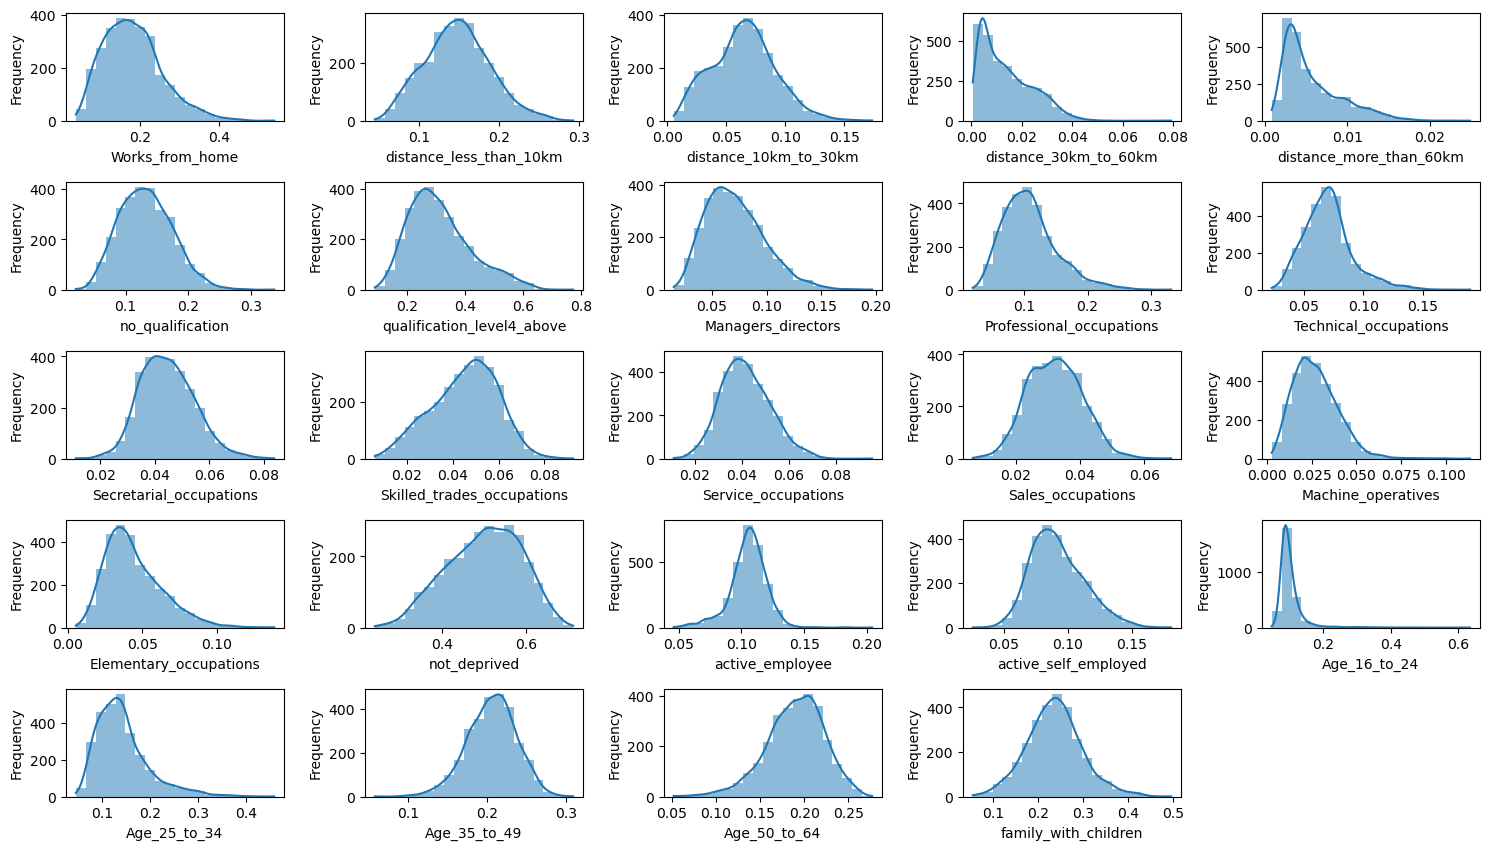

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_var = df.copy()

plt.figure(figsize=(15,20))

rows = len(df_var.columns) // 2 + len(df_var.columns) % 2
cols = 5

for i, column in enumerate(df_var.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=df_var, x=column, bins=20, kde=True, linewidth= 0)  # 调整 linewidth 参数
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/1. Work Home Regression Model/Histograms of Variables.png"
plt.savefig(save_path)

plt.show()

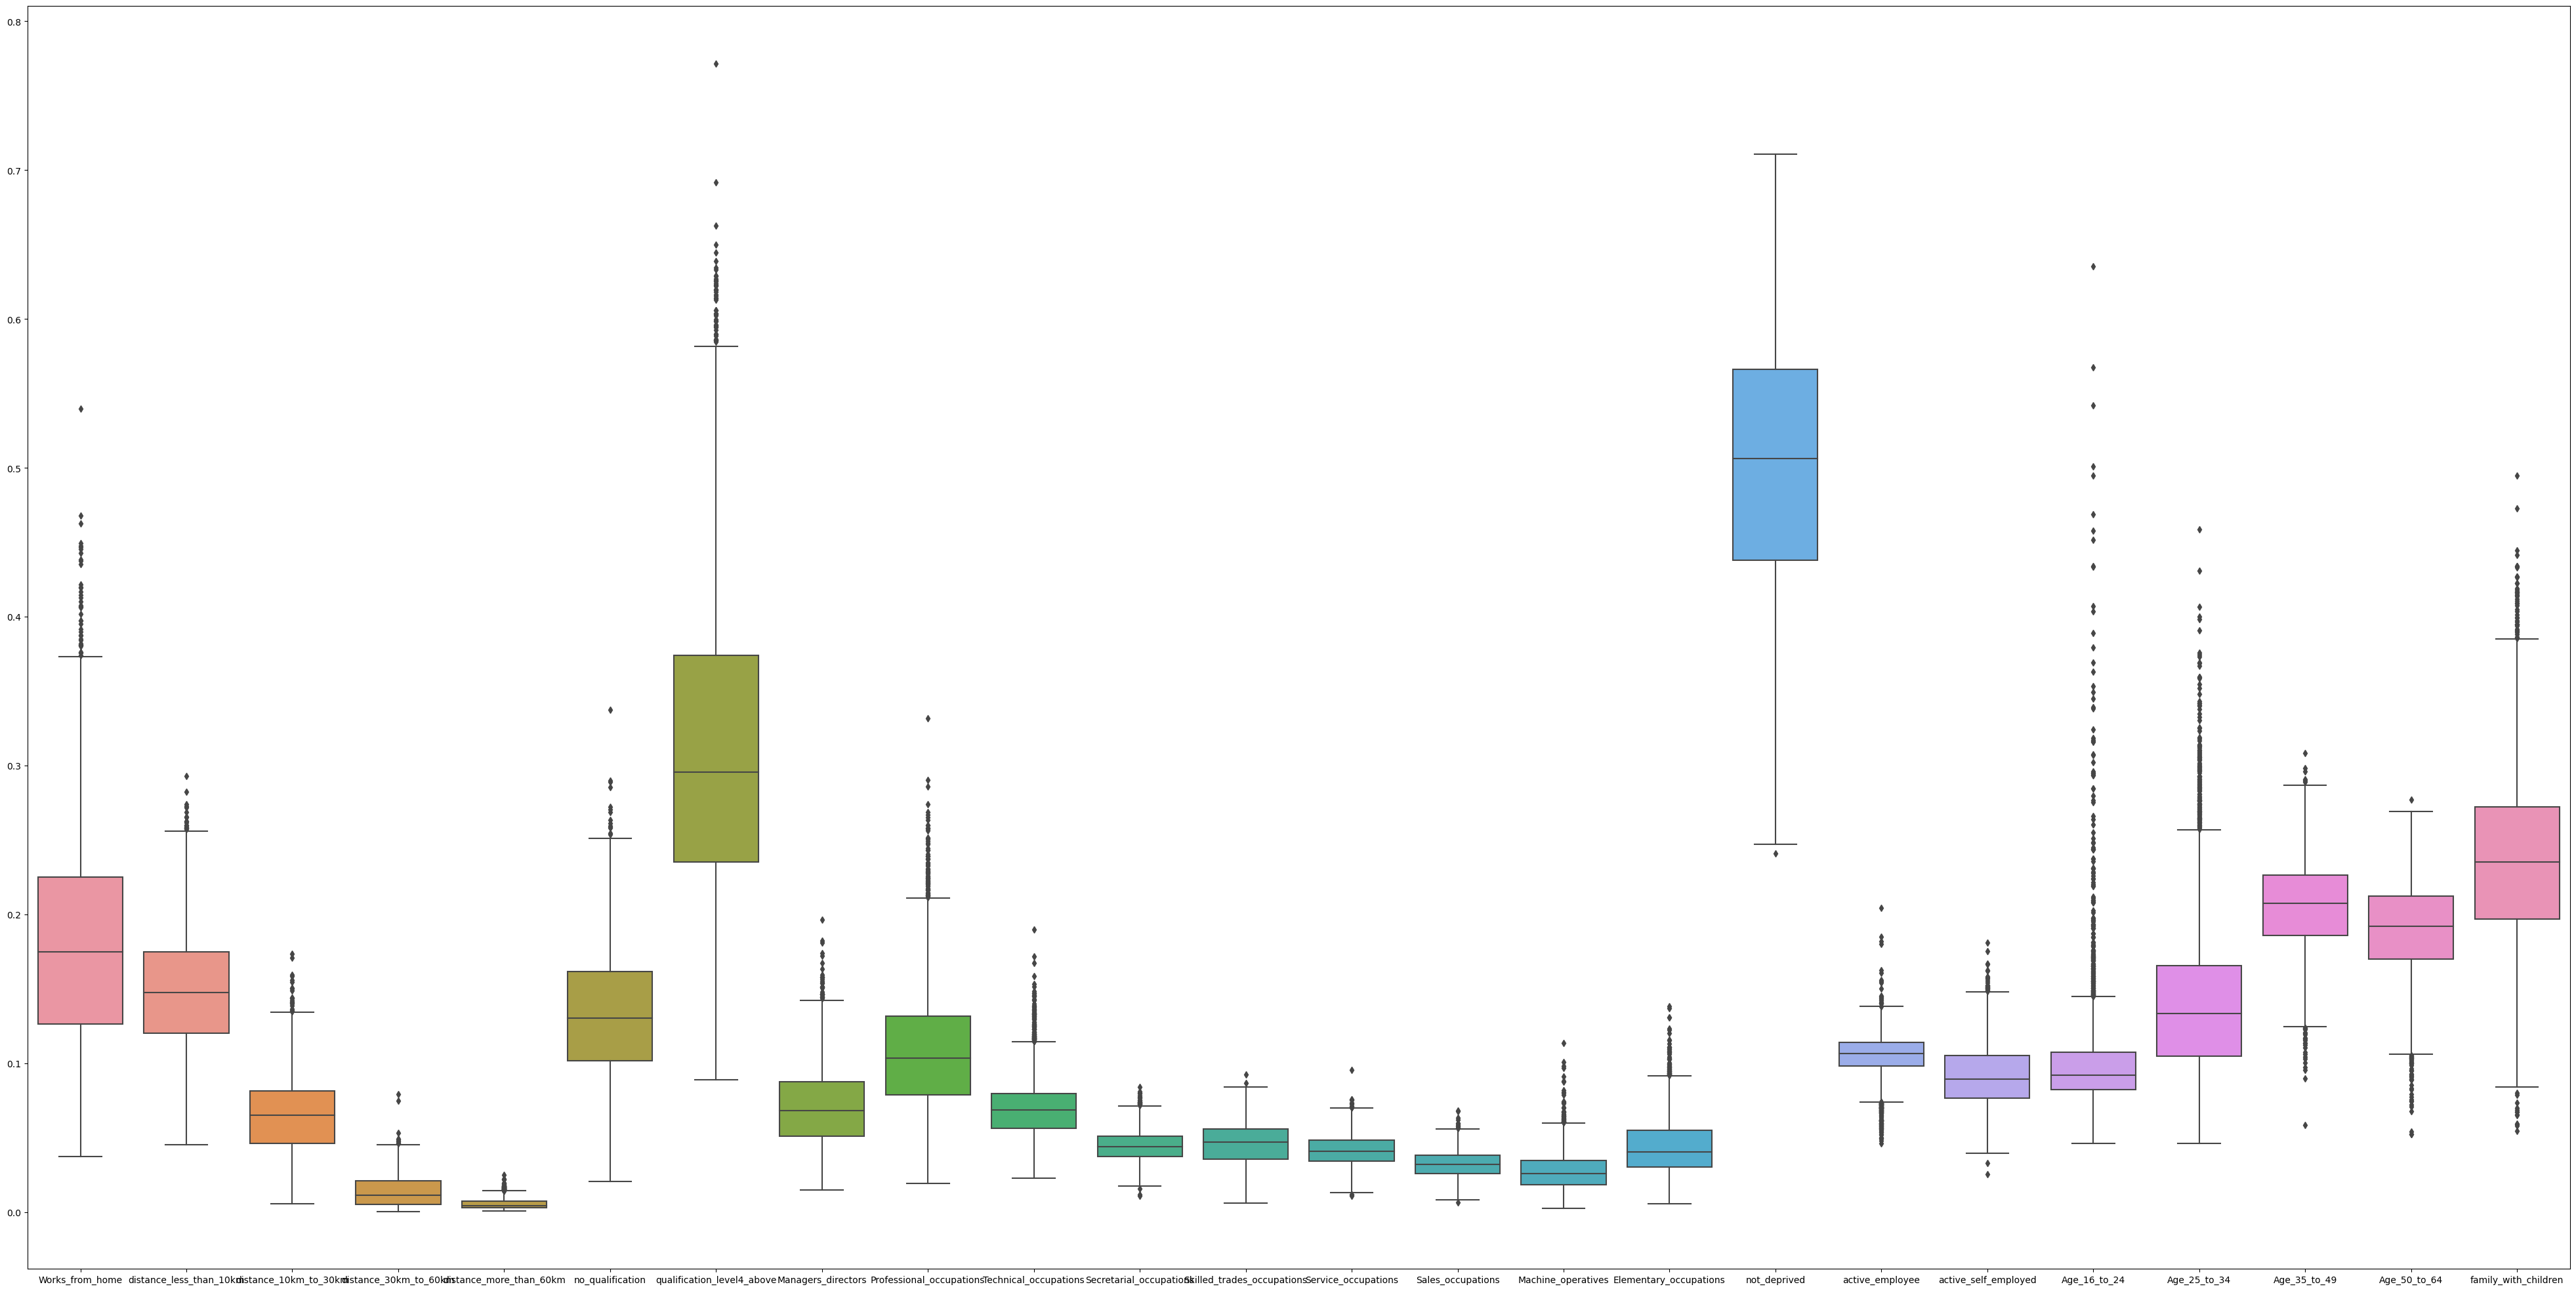

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,25))
sns.boxplot(data=df)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2867 entries, 0 to 2866
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Works_from_home             2867 non-null   float64
 1   distance_less_than_10km     2867 non-null   float64
 2   distance_10km_to_30km       2867 non-null   float64
 3   distance_30km_to_60km       2867 non-null   float64
 4   distance_more_than_60km     2867 non-null   float64
 5   no_qualification            2867 non-null   float64
 6   qualification_level4_above  2867 non-null   float64
 7   Managers_directors          2867 non-null   float64
 8   Professional_occupations    2867 non-null   float64
 9   Technical_occupations       2867 non-null   float64
 10  Secretarial_occupations     2867 non-null   float64
 11  Skilled_trades_occupations  2867 non-null   float64
 12  Service_occupations         2867 non-null   float64
 13  Sales_occupations           2867 

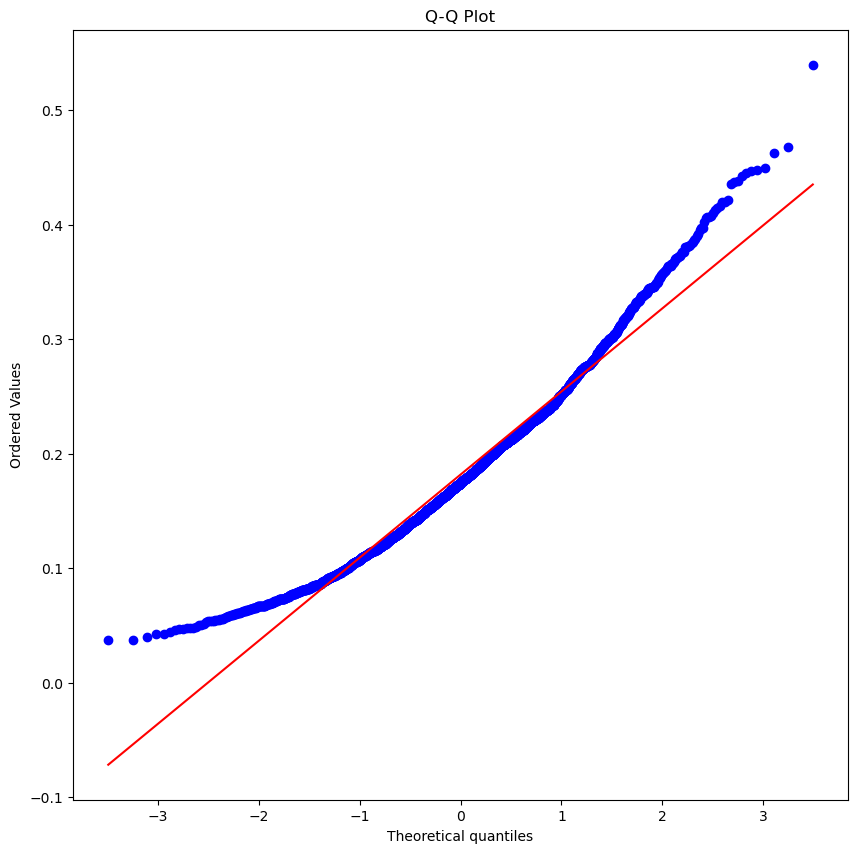

In [39]:
import matplotlib.pyplot as plt
from scipy import stats


data = df['Works_from_home']

plt.figure(figsize=(10,10))
stats.probplot(data, plot=plt)

plt.title("Q-Q Plot")

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/1. Work Home Regression Model/Probability Plot.png"
plt.savefig(save_path)

plt.show()


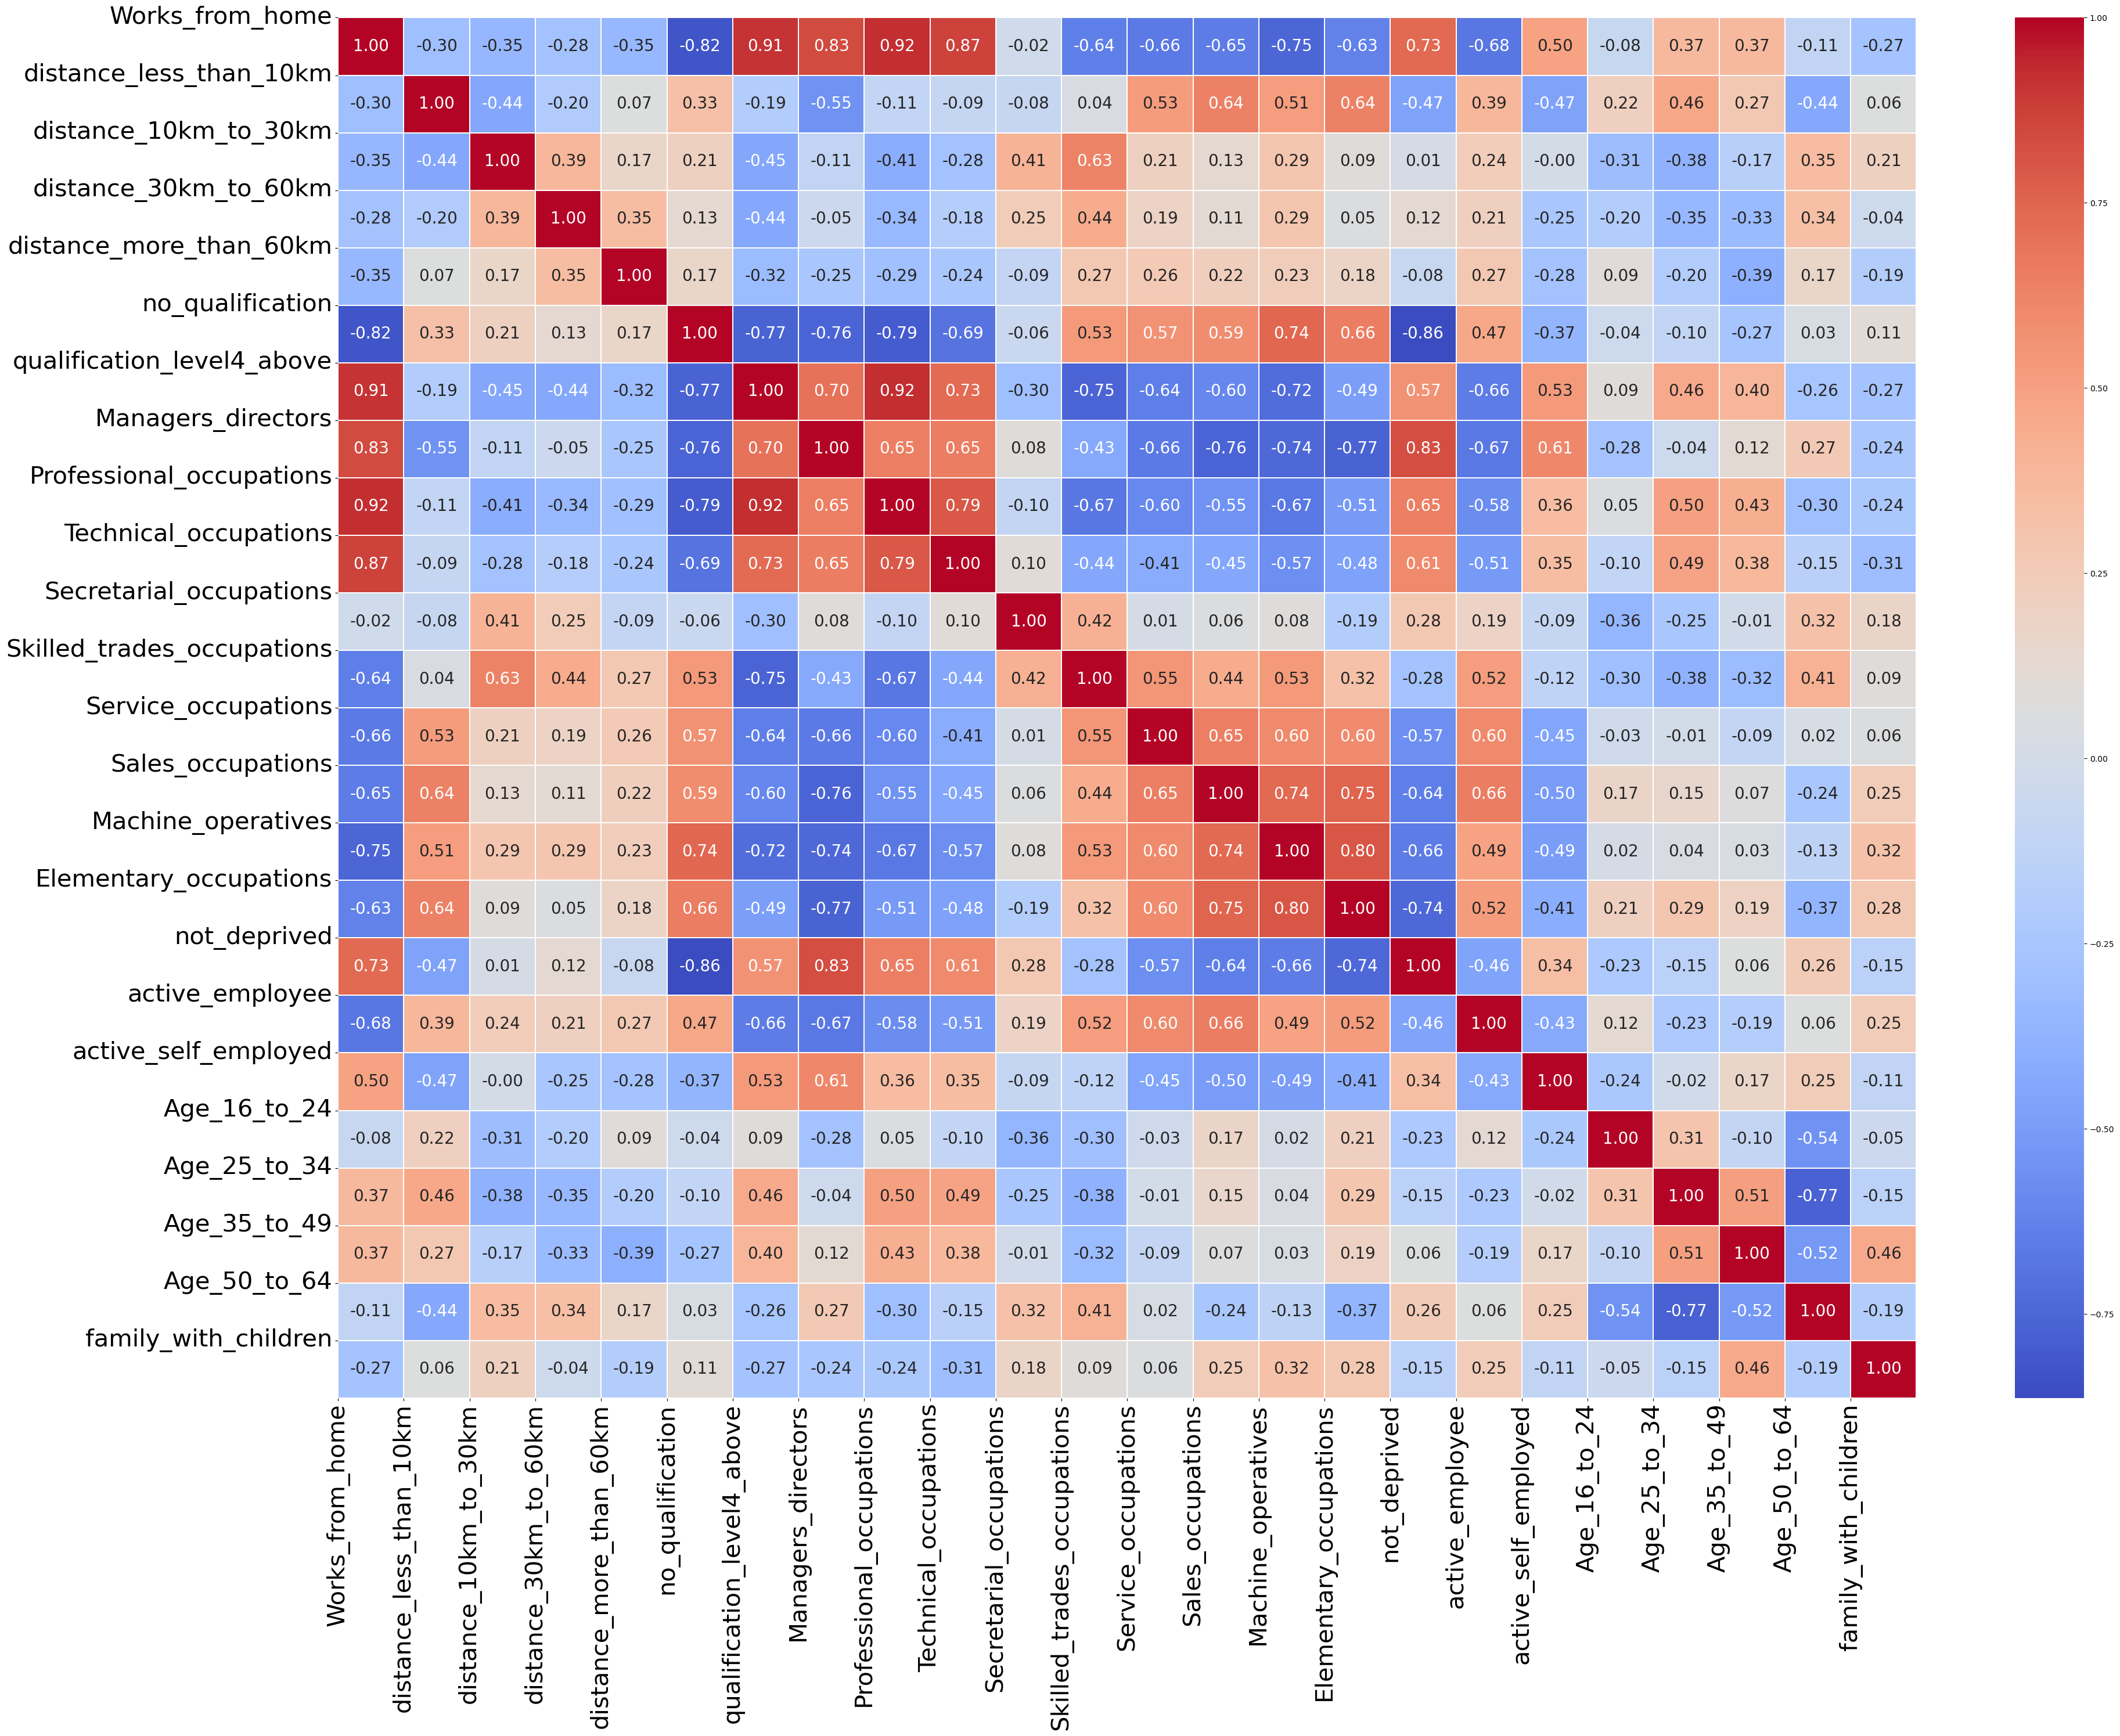

In [40]:
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(40, 30))

sns.heatmap(df.corr(),
            linewidths = 0.1,
            annot=True,
            fmt=".2f", 
            cmap='coolwarm',
            annot_kws={"fontsize":20}) 
plt.xticks(range(df.shape[1]), df.columns, fontsize=30, rotation = 90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=30)
plt.tight_layout()

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/1. Work Home Regression Model/Correlation Matrix.png"
plt.savefig(save_path)

plt.show()

In [41]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#[1]: http://planspace.org/20150423-forward_selection_with_statsmodels/
#[2]: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

In [42]:
df1 = df.copy()

In [43]:
df1.columns

Index(['Works_from_home', 'distance_less_than_10km', 'distance_10km_to_30km',
       'distance_30km_to_60km', 'distance_more_than_60km', 'no_qualification',
       'qualification_level4_above', 'Managers_directors',
       'Professional_occupations', 'Technical_occupations',
       'Secretarial_occupations', 'Skilled_trades_occupations',
       'Service_occupations', 'Sales_occupations', 'Machine_operatives',
       'Elementary_occupations', 'not_deprived', 'active_employee',
       'active_self_employed', 'Age_16_to_24', 'Age_25_to_34', 'Age_35_to_49',
       'Age_50_to_64', 'family_with_children'],
      dtype='object')

In [44]:
df1_x = df1.drop(columns=['Works_from_home'])
df1_y = df1[['Works_from_home']]

X = df1_x
y = df1_y

result = stepwise_selection(X, y)
print('Selected independent variables are:')
print(result)

/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  qualification_level4_above     with p-value 0.0
Add  Technical_occupations          with p-value 0.0
Add  Managers_directors             with p-value 0.0


/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Professional_occupations       with p-value 9.1546e-306
Add  distance_more_than_60km        with p-value 9.09925e-57
Add  distance_less_than_10km        with p-value 4.18621e-44


/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  distance_10km_to_30km          with p-value 2.11263e-122
Add  Elementary_occupations         with p-value 7.18946e-168
Add  distance_30km_to_60km          with p-value 1.58629e-90


/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Sales_occupations              with p-value 5.04616e-120
Add  Secretarial_occupations        with p-value 4.21645e-51
Add  Service_occupations            with p-value 1.069e-95


/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Machine_operatives             with p-value 2.40515e-118
Add  active_self_employed           with p-value 7.73169e-89
Drop qualification_level4_above     with p-value 0.077469
Add  Skilled_trades_occupations     with p-value 1.36947e-80


/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Age_50_to_64                   with p-value 3.47727e-53
Add  family_with_children           with p-value 5.2177e-12
Add  Age_25_to_34                   with p-value 2.41364e-28
Add  Age_16_to_24                   with p-value 1.46807e-06


/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/r4/qjfgbpps43qbp_36z28zdgf00000gn/T/ipykernel_6915/2602246479.py:24: FutureWarning: The default dtype for empty Series will be 'object' inste

Drop Age_50_to_64                   with p-value 0.670195
Add  not_deprived                   with p-value 2.6886e-07
Add  qualification_level4_above     with p-value 0.000442323
Selected independent variables are:
['Technical_occupations', 'Managers_directors', 'Professional_occupations', 'distance_more_than_60km', 'distance_less_than_10km', 'distance_10km_to_30km', 'Elementary_occupations', 'distance_30km_to_60km', 'Sales_occupations', 'Secretarial_occupations', 'Service_occupations', 'Machine_operatives', 'active_self_employed', 'Skilled_trades_occupations', 'family_with_children', 'Age_25_to_34', 'Age_16_to_24', 'not_deprived', 'qualification_level4_above']


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df1_corr = df1[['Technical_occupations', 'Managers_directors', 'Professional_occupations', 
                'distance_more_than_60km', 'distance_less_than_10km', 'distance_10km_to_30km', 
                'Elementary_occupations', 'distance_30km_to_60km', 'Sales_occupations', 
                'Secretarial_occupations', 'Service_occupations', 'Machine_operatives', 
                'active_self_employed', 'Skilled_trades_occupations', 'family_with_children', 
                'Age_25_to_34', 'Age_16_to_24', 'not_deprived', 'qualification_level4_above'
               ]]
X = add_constant(df1_corr)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                         381.079088
Technical_occupations           4.994862
Managers_directors             10.688898
Professional_occupations       20.817611
distance_more_than_60km         1.595627
distance_less_than_10km        12.312402
distance_10km_to_30km           6.553183
Elementary_occupations          7.902368
distance_30km_to_60km           2.785279
Sales_occupations               4.105251
Secretarial_occupations         3.209445
Service_occupations             3.955612
Machine_operatives              7.197462
active_self_employed            4.511305
Skilled_trades_occupations      7.104046
family_with_children            1.885675
Age_25_to_34                    6.820724
Age_16_to_24                    1.815224
not_deprived                   11.521569
qualification_level4_above     33.177485
dtype: float64

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df1_corr = df1[['Technical_occupations', 
                'distance_more_than_60km', 'distance_10km_to_30km', 
                'distance_30km_to_60km', 'Sales_occupations', 
                'Secretarial_occupations', 'Service_occupations', 'Machine_operatives', 
                'active_self_employed', 'Skilled_trades_occupations', 'family_with_children', 
                'Age_25_to_34', 'Age_16_to_24', 'not_deprived'
                 ]]
X = add_constant(df1_corr)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                         327.631901
Technical_occupations           4.797162
distance_more_than_60km         1.521081
distance_10km_to_30km           2.022673
distance_30km_to_60km           1.831297
Sales_occupations               3.333146
Secretarial_occupations         2.198735
Service_occupations             2.652932
Machine_operatives              4.373709
active_self_employed            2.134355
Skilled_trades_occupations      4.326629
family_with_children            1.581193
Age_25_to_34                    3.445027
Age_16_to_24                    1.597106
not_deprived                    4.089135
dtype: float64

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df1_corr_1 = df1[['distance_10km_to_30km', 'distance_30km_to_60km', 'distance_more_than_60km', 
                'Technical_occupations', 'Secretarial_occupations',  'Sales_occupations', 'Service_occupations', 
                'Skilled_trades_occupations', 'Machine_operatives', 
                'active_self_employed', 'family_with_children', 'not_deprived', 
                'Age_16_to_24', 'Age_25_to_34']]
X = add_constant(df1_corr_1)
vif_results = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

# 将VIF结果导出到本地CSV文件
vif_results.to_csv("/Users/yobin/Desktop/USS Dissertation/Figures/1. Work Home Regression Model/vif_results.csv")

In [48]:
model_1 = smf.ols(formula= 'Works_from_home ~ distance_10km_to_30km+distance_30km_to_60km+distance_more_than_60km+Technical_occupations+Secretarial_occupations+Sales_occupations+Service_occupations+Machine_operatives+Skilled_trades_occupations+active_self_employed+family_with_children+not_deprived+Age_16_to_24+Age_25_to_34',
                            data=df1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Works_from_home   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     4406.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:31:45   Log-Likelihood:                 7881.4
No. Observations:                2867   AIC:                        -1.573e+04
Df Residuals:                    2852   BIC:                        -1.564e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [49]:
model_summary = model_1.summary().as_text()

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/1. Work Home Regression Model/model_summary_f.txt"
with open(save_path, 'w') as f:
    f.write(model_summary)

In [50]:
df_residual = df1[['Works_from_home','distance_10km_to_30km', 'distance_30km_to_60km', 'distance_more_than_60km', 
                'Technical_occupations', 'Secretarial_occupations',  'Sales_occupations', 'Service_occupations', 
                'Skilled_trades_occupations', 'Machine_operatives', 
                'active_self_employed', 'family_with_children', 'not_deprived', 
                'Age_16_to_24', 'Age_25_to_34']]

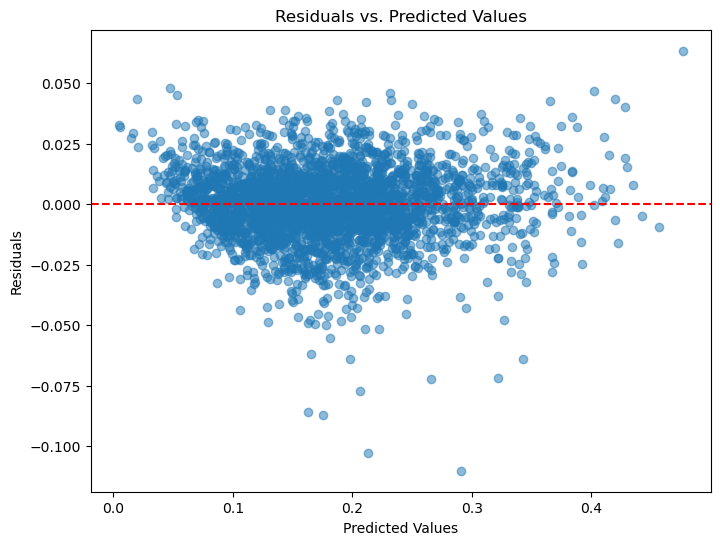

In [51]:
y_pred = model_1.predict(df_residual)
residuals = model_1.resid

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

save_path = "/Users/yobin/Desktop/USS Dissertation/Figures/1. Work Home Regression Model/Residuals.png"
plt.savefig(save_path)

plt.show()

# 

# 

# 